# Twitter Covid Vaccination Tweets Polarization

## Overview

**1.)** Connect to twitter api v2 and retrieve tweets related to covid vaccination, no retweets and replies [~5,000]

**2.)** Analyze data, preprocess, look at sentiment polarity and intensity scores with VADER, Create WordClouds, visuals

**3.)** For automatic labelling of 0: antivaccination tweet, 1: provaccination tweet use

**3.1)** LDA for document topic modelling

**3.2)** WORD2VEC MODEL + KMEANS

**3.3)** Unsupervised clustering algorithms: PCA + KMEANS

**3.4)** LDA2VEC

**4.)** Apply various machine learning algorithms

**5.)** RNN LSTM deep learning

**6.)** Analyze results

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings('ignore')
import re
import string

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time


'''
Loading Gensim and nltk libraries
'''
# pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

import nltk
nltk.download('wordnet') #lemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# PART 2: Analyze data, preprocess, look at sentiment polarity and intensity scores with VADER, Create WordClouds, visuals

In [70]:
#~8,000+ Tweets were collected using the twitter api v2 
#from Jan 1, 2021 - March 1,2022
#tweets were retrieved using search keywords such as:

#Replies and retweets were not collected

#Inputs for tweets


'''
“vaccine” OR “vaccines” OR “vaccinate” OR “vaccination” OR “vaccineswork”
OR “antivax” OR “vaccinesdontwork” OR “provax” OR “vaxwithme” OR “antivaxxers” OR “immunization”'''

df = pd.read_csv("new_final_vaccine_tweets.csv")

In [74]:
#drop these features, insignificant 
df.drop(columns=["author id", "id"], axis=1, inplace=True)

# Sentiment Analysis of unprocessed Tweets

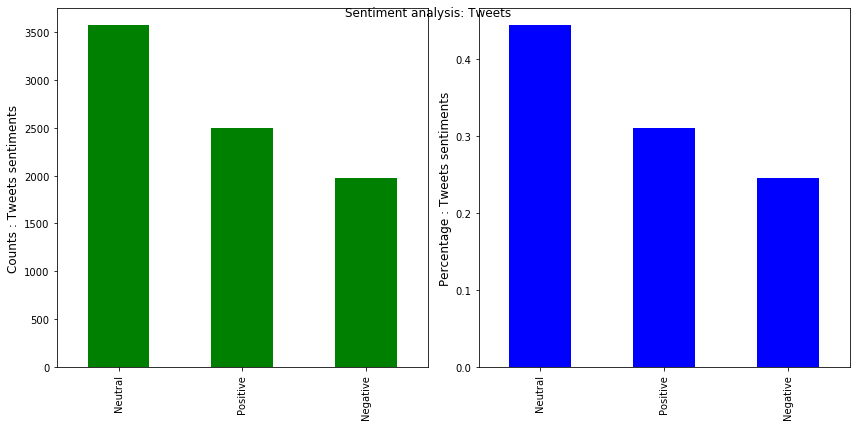

In [58]:
#NEUTRAL Tweet -0.25 <= compund_vader_score <= +0.25
#Negative Tweet: -1 < vader_compound_score < -0.25
#Positive Tweet: +0.25 < compound_vader_score <= +1

# VADER Sentiment Polarity Classification [-1, +1]

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    
    vader_compound_score = sia.polarity_scores(post)["compound"]
    
    if 0.25 < vader_compound_score:
        return "Positive"
    elif (-0.25 <= vader_compound_score) and (vader_compound_score < 0.25):
        return "Neutral"
    else:
        return "Negative"
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
    
    
df['sentiment'] = df['tweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Tweets')

In [59]:
df['sentiment'].value_counts()

Neutral     3571
Positive    2500
Negative    1977
Name: sentiment, dtype: int64

In [60]:
df.loc[df["sentiment"] == "Neutral"]

,tweet,sentiment
3,How the #COVID19Vaccine Works! ⬇️ 👍🏻 #Vaccines...,Neutral
4,"vaccine making me feel weird, might become ant...",Neutral
5,#CoronaVirusUpdates \n#SARS2 2021-06-30 GMT\n2...,Neutral
6,#CoronaVirusUpdates \n#SARS2 2021-06-30 GMT\n2...,Neutral
8,#India: #Mumbai: CSMIA along with MCGM contin...,Neutral
...,...,...
8038,"Thank you, @united! I will be flying with you ...",Neutral
8039,Fully vaccinated!💉 #VaccinesWork #Sinovac http...,Neutral
8042,COVID vaccine 💉booster #VaccinesWork #pfizerb...,Neutral
8044,*excitement building* If the data supports the...,Neutral


In [13]:
#Sentiment analysis does not provide any useful insights

In [61]:
#top 20 most frequent words in dataset
from collections import Counter
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
      if(len(word)>3):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('#vaccineswork', 2415),
 ('#vaccinesdontwork', 1382),
 ('#covid19', 1352),
 ('this', 1164),
 ('that', 982),
 ('#vaccineskill', 895),
 ('with', 877),
 ('#getvaccinated', 851),
 ('#vaccinessavelives', 784),
 ('have', 765),
 ('your', 690),
 ('covid', 668),
 ('vaccines', 665),
 ('&amp;', 659),
 ('from', 659),
 ('vaccine', 627),
 ('just', 601),
 ('people', 574),
 ('#maskup', 571),
 ('they', 571)]

In [15]:
#Problem: the hashtags are treated as single a word of text, must
#break down into individual words

# Unprocessed Tweets WordClouds

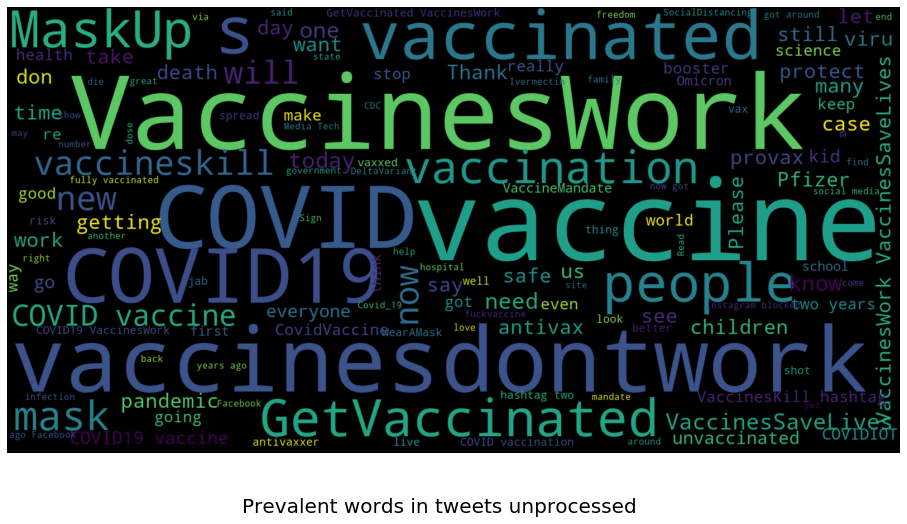

In [62]:
#Unprocessed Tweet WordCloud

#WORDCLOUDS

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
    
#MOST PREVALENT WORDS IN TWEETS

show_wordcloud(df['tweet'], title = 'Prevalent words in tweets unprocessed')

# Preprocess Tweets

The Preprocessing steps taken are:

Split hashtags into component words

Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed.

Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

Lemmatizing and stemming: Lemmatization and stemming is the process of converting a word to its base form. Also changing past and future tenses(e.g: “wolves” to “wolf”)

Lowercase all text

# Hashtag Extraction

In [76]:
df['hashtag'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))

# Text Preprocessing and hashtag segmentation

In [71]:
#remove, and username strings from each tweet

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

def preprocess_tweets(tweet):
    #lowercase
    tweet = tweet.lower() 
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    
    return tweet
    
df['tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x))

In [77]:
df

,tweet,hashtag
0,if russian ron had financial ties to the vacci...,"[vaccineswork, shutuprussianron]"
1,thanks to pharmasave in amherstview... feels g...,"[vaccineswork, vaccinated]"
2,really scared of the delta variant\n\nthe thre...,"[covidisreal, wearamask, getvaccinated, vaccin..."
3,how the #covid19vaccine works! ⬇️ 👍🏻 #vaccines...,"[covid19vaccine, vaccineswork, twodosesummer, ..."
4,"vaccine making me feel weird, might become ant...",[]
...,...,...
8043,catching covid-19 is as simple as taking a bre...,"[vaccineswork, workwiddivaccine]"
8044,*excitement building* if the data supports the...,"[covid19vaccine, vaccineswork, flushot]"
8045,suspect many of these are booster doses in acc...,[vaccineswork]
8046,we are down at showing support for a #vaccine...,"[vaccinemandate, sandiego, vaccineswork]"


In [73]:
from ekphrasis.classes.segmenter import Segmenter

In [45]:
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus='twitter')

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams C:\Users\Mia\.ekphrasis\stats\twitter\counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams C:\Users\Mia\.ekphrasis\stats\twitter\counts_2grams.txt


In [47]:
!pip install tweet-preprocessor

You should consider upgrading via the 'c:\users\mia\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [78]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


df['new_tweets'] = df['tweet'].apply(lambda x: text_processor.pre_process_doc(x))

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [79]:
df['new_tweets'] = df['new_tweets'].apply(lambda x: ' '.join(x))

In [113]:
df

,tweet,hashtag,new_tweets,str_processed_tweets
0,if russian ron had financial ties to the vacci...,"[vaccineswork, shutuprussianron]","[russian, financi, tie, vaccin, manufactur, gr...",russian financi tie vaccin manufactur greatest...
1,thanks to pharmasave in amherstview... feels g...,"[vaccineswork, vaccinated]","[thank, pharmasav, amherstview, feel, great, s...",thank pharmasav amherstview feel great son sec...
2,really scared of the delta variant\n\nthe thre...,"[covidisreal, wearamask, getvaccinated, vaccin...","[scar, delta, variant, peopl, love, world, yea...",scar delta variant peopl love world year real ...
3,how the #covid19vaccine works! ⬇️ 👍🏻 #vaccines...,"[covid19vaccine, vaccineswork, twodosesummer, ...","[covid, vaccin, work, vaccin, work, dose, summ...",covid vaccin work vaccin work dose summer covid
4,"vaccine making me feel weird, might become ant...",[],"[vaccin, make, feel, weird, antivax]",vaccin make feel weird antivax
...,...,...,...,...
8043,catching covid-19 is as simple as taking a bre...,"[vaccineswork, workwiddivaccine]","[catch, covid, simpl, take, breath, spread, si...",catch covid simpl take breath spread simpl spe...
8044,*excitement building* if the data supports the...,"[covid19vaccine, vaccineswork, flushot]","[excit, build, data, support, safeti, efficaci...",excit build data support safeti efficaci covid...
8045,suspect many of these are booster doses in acc...,[vaccineswork],"[suspect, booster, dose, accord, week, guidanc...",suspect booster dose accord week guidanc impor...
8046,we are down at showing support for a #vaccine...,"[vaccinemandate, sandiego, vaccineswork]","[show, support, vaccin, mandat, diego, vaccin,...",show support vaccin mandat diego vaccin work


In [102]:
df['new_tweets'] = df['new_tweets'].str.replace('</happy>', '')

In [104]:
df.to_csv("segmented_hashtags.csv")

In [108]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

df['new_tweets'] = df['new_tweets'].apply(lambda x: preprocess(x))


In [110]:
#Preview preprocessed tweets
df['str_processed_tweets'] = df['new_tweets'].apply(lambda x: " ".join(x))

In [112]:
df.to_csv("final_better_hashtags.csv")

# LDA DOCUMENT TOPIC MODELING

In [119]:
'''
Preview 'processed_docs'
'''
processed_docs = []


for tweet in df["new_tweets"]:
    processed_docs.append(tweet)

In [120]:
#BOW

'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(df['new_tweets'])

In [121]:
'''
Checking dictionary created
'''

'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [122]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 21
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 8 ("vaccin") appears 1 time.
Word 9 ("work") appears 1 time.
Word 32 ("covid") appears 1 time.
Word 83 ("get") appears 1 time.
Word 134 ("abl") appears 2 time.
Word 135 ("anthoni") appears 1 time.
Word 136 ("begin") appears 1 time.
Word 137 ("break") appears 1 time.
Word 138 ("children") appears 1 time.
Word 139 ("deserv") appears 1 time.
Word 140 ("enjoy") appears 1 time.
Word 141 ("extend") appears 1 time.
Word 142 ("fauci") appears 2 time.
Word 143 ("fourth") appears 1 time.
Word 144 ("hope") appears 1 time.
Word 145 ("juli") appears 1 time.
Word 146 ("recent") appears 1 time.
Word 147 ("rest") appears 1 time.


In [123]:
'''
Step 4: Running LDA using Bag of Words
We are going for 10 topics in the document corpus.

We will be running LDA using all CPU cores to parallelize and speed up model training.

Some of the parameters we will be tweaking are:

num_topics is the number of requested latent topics to be extracted from the training corpus.
id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
workers is the number of extra processes to use for parallelization. Uses all available cores by default.
alpha and eta are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

Alpha is the per document topic distribution.

High alpha: Every document has a mixture of all topics(documents appear similar to each other).
Low alpha: Every document has a mixture of very few topics
Eta is the per topic word distribution.

High eta: Each topic has a mixture of most words(topics appear similar to each other).
Low eta: Each topic has a mixture of few words.
passes is the number of training passes through the corpus. For example, if the training corpus has 50,000 documents, chunksize is 10,000, passes is 2, then online training is done in 10 updates:

'''

# LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
# lda_model = gensim.models.LdaModel(bow_corpus, 
#                                    num_topics = 4 , 
#                                    id2word = dictionary,                                    
#                                    passes = 50)

# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
#implement 8 different LDA models ranging from 2 document topics -> 10 topics


lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 10,workers = 2, random_state=0)

In [124]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''

d={}
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")
    d[idx] = topic


Topic: 0 
Words: 0.086*"vaccin" + 0.037*"work" + 0.013*"demi" + 0.013*"lockdown" + 0.009*"plan" + 0.008*"bodi" + 0.008*"virus" + 0.007*"life" + 0.007*"kill" + 0.007*"anim"


Topic: 1 
Words: 0.155*"vaccin" + 0.047*"save" + 0.046*"live" + 0.040*"work" + 0.028*"covid" + 0.008*"booster" + 0.007*"children" + 0.007*"protect" + 0.007*"thank" + 0.006*"need"


Topic: 2 
Words: 0.031*"vaccin" + 0.022*"stay" + 0.019*"home" + 0.018*"covid" + 0.016*"treat" + 0.011*"food" + 0.011*"test" + 0.008*"work" + 0.006*"yummi" + 0.005*"negat"


Topic: 3 
Words: 0.100*"vaccin" + 0.063*"kill" + 0.034*"anti" + 0.025*"facebook" + 0.023*"year" + 0.020*"hashtag" + 0.019*"media" + 0.019*"block" + 0.017*"news" + 0.014*"instagram"


Topic: 4 
Words: 0.229*"vaccin" + 0.081*"work" + 0.043*"covid" + 0.017*"mandat" + 0.017*"effect" + 0.014*"death" + 0.010*"kill" + 0.010*"peopl" + 0.008*"passport" + 0.007*"live"


Topic: 5 
Words: 0.028*"stay" + 0.026*"home" + 0.024*"mask" + 0.020*"social" + 0.018*"let" + 0.017*"earn" + 0

In [125]:
#ANTI-VACCINATION STANCE: 3, 
#PRO-VACCINATION STANCE: 0, 1, 2, 

#PROBLEM: TOO MANY MORE PRO-VACCINATION STANCE TOPICS, UNBALANCED AND BIASED
#TOWARDS THE PRO-VACCINATION

In [126]:
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.149885 -0.052108       1        1  28.659101
8     -0.037673 -0.120271       2        1  14.332402
1      0.110483 -0.104599       3        1  14.023812
6      0.084037 -0.048561       4        1  11.991657
3      0.112548  0.154271       5        1   7.522683
0      0.040202 -0.011802       6        1   6.492671
5     -0.176177 -0.053970       7        1   5.583826
7     -0.190064  0.011784       8        1   4.636099
2     -0.114447  0.073843       9        1   3.468165
9      0.021206  0.151413      10        1   3.289584, topic_info=        Term          Freq         Total Category  logprob  loglift
22      mask   1550.000000   1550.000000  Default  30.0000  30.0000
8     vaccin  13366.000000  13366.000000  Default  29.0000  29.0000
622     kill   1017.000000   1017.000000  Default  28.0000  28.0000
89     shoot    379.000000    379.000000  Default  27.0000  27.0000
195     save    976.000000    976.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
34   antivax     15.115336    117.932363  Topic10  -5.4437   1.3600
11      dose     15.591117    223.051444  Topic10  -5.4127   0.7537
159   matter     12.431034     94.333332  Topic10  -5.6392   1.3878
9       work     21.809744   4318.421933  Topic10  -5.0770  -1.8739
242    immun     12.998673    249.942939  Topic10  -5.5946   0.4580

[689 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
352      10  0.843223       ach
1523      3  0.805067    achiev
1523      9  0.161013    achiev
37        2  0.662337     activ
37        3  0.185454     activ
...     ...       ...       ...
4575      9  0.953046     yummi
2707      7  0.810866      zoom
6777      2  0.874724  الاجباري
6788      2  0.874726   للتطعيم
8581     10  0.652261     پولیو

[1824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 2, 7, 4, 1, 6, 8, 3, 10])

# LSA(PCA + K-MEANS)

In [128]:
X = df['str_processed_tweets'].values

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2000, random_state=42)
X_svd = svd.fit_transform(X)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
idx = np.argmax(cum_variance > .8)
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X)

c:\users\mia\appdata\local\programs\python\python38\lib\site-packages\scipy\linalg\decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
c:\users\mia\appdata\local\programs\python\python38\lib\site-packages\scipy\linalg\decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

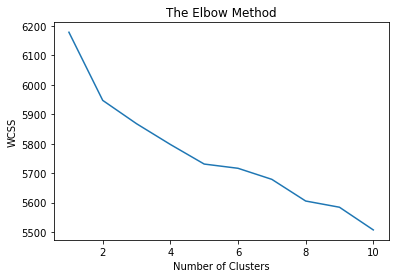

In [129]:
#ELBOW METHOD TO GET OPTIMAL NUMBER OF CLUSTERS

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_svd)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#OPTIMAL NUMBER OF CLUSTERS IS 8

In [130]:
kmeans = KMeans(n_clusters = 8, init='k-means++', random_state=0)
kmeans.fit(X_svd)

KMeans(random_state=0)

In [132]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(8):
    print("Cluster:", i)
    for ind in order_centroids[i, :10]:
        print('', terms[ind])
    print()

Top terms per cluster:
Cluster: 0
 abli
 aarogya
 abort
 aaron
 accident
 ableist
 academia
 abc
 abaddon
 acral

Cluster: 1
 ableist
 aarogya
 aaron
 abandon
 abil
 abolish
 abort
 abound
 access
 academ

Cluster: 2
 abandon
 aarogya
 aaron
 abat
 abcovid
 acceler
 accent
 accid
 abraham
 accomplish

Cluster: 3
 aarogya
 aarp
 abat
 abandon
 abc
 abound
 acabarà
 abort
 accept
 abil

Cluster: 4
 abaddon
 abat
 aaron
 aarp
 aarogya
 abc
 abort
 abil
 acog
 abrazar

Cluster: 5
 aarp
 aaron
 aarogya
 abbott
 abandon
 abort
 actual
 abil
 adelaid
 abrazar

Cluster: 6
 aarogya
 aaron
 abcovid
 abaddon
 abbott
 abort
 accessori
 abraham
 absurd
 accomplish

Cluster: 7
 aarogya
 aaron
 abbott
 abli
 abaddon
 abl
 abandon
 aboard
 abil
 abnorm



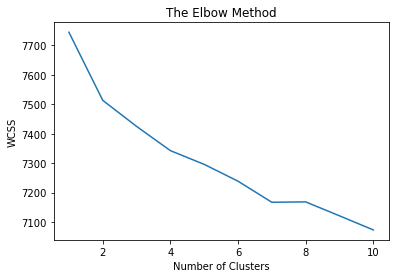

In [133]:
#Regular K-MEANS Clustering

X = df['str_processed_tweets'].values

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
kmeans = KMeans(n_clusters = 7, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=0)

In [137]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(7):
    print("Cluster :", i)
    for ind in order_centroids[i, :10]:
        print(' ', terms[ind])
    print()

Top terms per cluster:
Cluster : 0
  vaccin
  work
  covid
  kill
  peopl
  fuck
  shoot
  anti
  live
  health

Cluster : 1
  home
  stay
  remot
  earn
  hire
  job
  search
  posit
  social
  bonus

Cluster : 2
  tech
  media
  prime
  news
  kill
  vaccin
  lasso
  comic
  home
  thank

Cluster : 3
  vaccin
  work
  save
  covid
  live
  effect
  mandat
  death
  passport
  kill

Cluster : 4
  work
  vaccin
  covid
  mask
  mandat
  fulli
  lockdown
  effect
  say
  kill

Cluster : 5
  facebook
  block
  hashtag
  year
  instagram
  kill
  late
  vaccin
  stori
  ban

Cluster : 6
  mask
  wear
  vaccin
  work
  covid
  live
  save
  omicron
  safe
  distanc

